<a href="https://colab.research.google.com/github/fahadrajput99/deep-learning/blob/main/build_single_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(x_train , y_train) , (x_test , y_test)= keras.datasets.mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train[0].shape

(28, 28)

In [31]:
x_train[4]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [30]:
x_train=x_train/255
x_test=x_test/255

In [48]:
x_train_flatten=x_train.reshape(len(x_train) , 28*28)
x_test_flatten=x_test.reshape(len(x_test) , 28*28)

In [49]:
x_test_flatten.shape

(10000, 784)

In [51]:
model=keras.Sequential([
    keras.layers.Dense(10 , input_shape=(784 ,) , activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flatten , y_train , epochs=7)

Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4730 - accuracy: 0.8762
Epoch 2/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3044 - accuracy: 0.9152
Epoch 3/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9232
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9257
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2619 - accuracy: 0.9269
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9278


In [47]:
x_test_flatten=x_train.reshape(len(x_test) , 28*28)


60000

In [39]:
y_test.shape

(10000,)

In [52]:
model.evaluate(x_test_flatten , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2642 - accuracy: 0.9277


[0.26419517397880554, 0.9276999831199646]

In [53]:
y_predicted=model.predict(x_test_flatten)

313/313 [==============================] - 1s 1ms/step


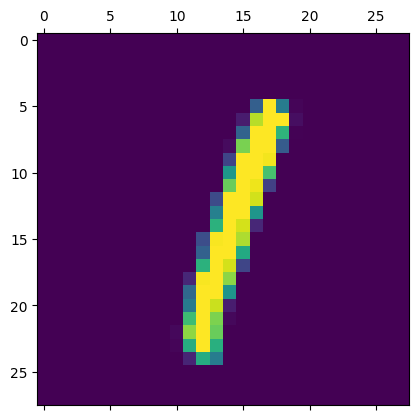

In [59]:
plt.matshow(x_test[5])

In [60]:
y_predicted[5]

array([3.9264778e-05, 9.9864078e-01, 5.4237610e-01, 3.7753046e-01,
       4.3442296e-03, 1.9558074e-02, 6.8468479e-03, 5.9633428e-01,
       4.7845763e-01, 1.4142592e-01], dtype=float32)

In [61]:
np.argmax(y_predicted[5])

1

In [64]:
y_predicted_label=[np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [65]:
cm=tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    4,    4,    3,    1,    0],
       [   0, 1117,    4,    2,    0,    1,    3,    2,    6,    0],
       [   4,    9,  934,   15,    6,    3,   10,    8,   38,    5],
       [   2,    0,   22,  920,    0,   23,    2,   11,   23,    7],
       [   1,    2,    6,    2,  896,    0,    9,    5,    9,   52],
       [   8,    3,    5,   33,    5,  785,    9,    8,   30,    6],
       [  12,    3,   11,    1,    7,   18,  902,    2,    2,    0],
       [   1,    7,   24,    4,    3,    0,    0,  957,    2,   30],
       [   6,   13,    6,   18,    9,   23,    8,   12,  871,    8],
       [  10,    8,    1,    8,   16,    5,    0,   22,    8,  931]],
      dtype=int32)>

<Axes: >

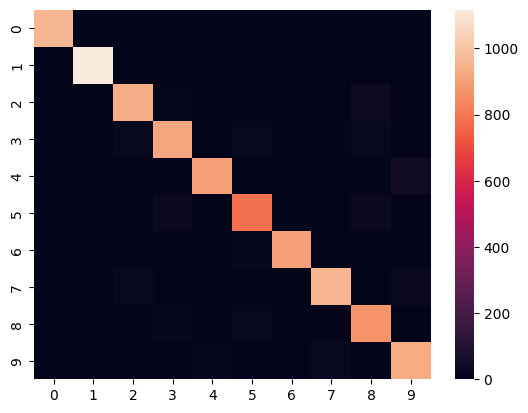

In [66]:
import seaborn as sns
sns.heatmap(cm)